  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

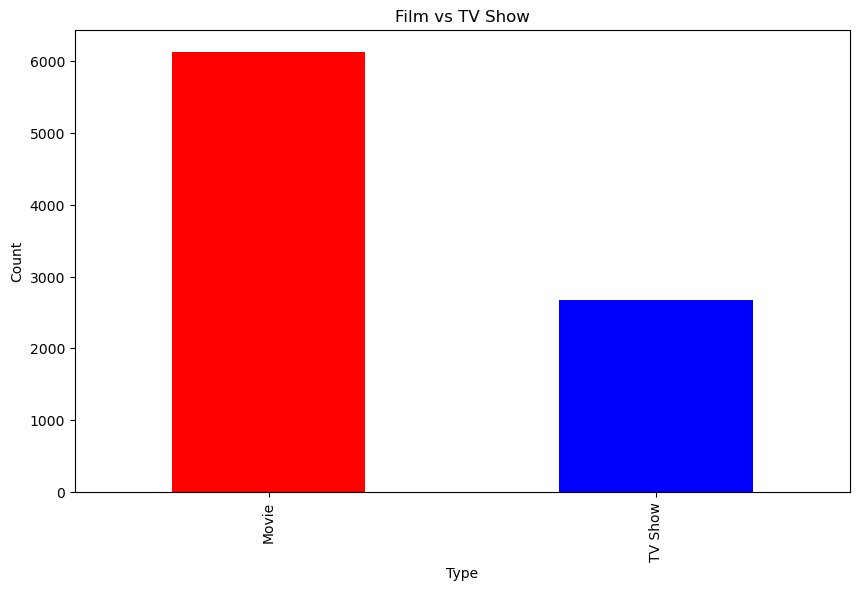

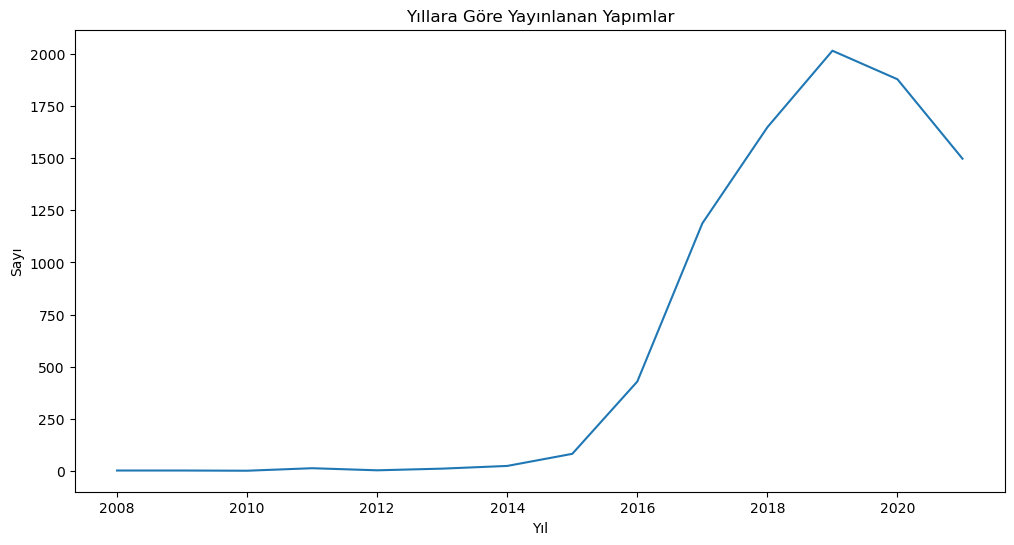

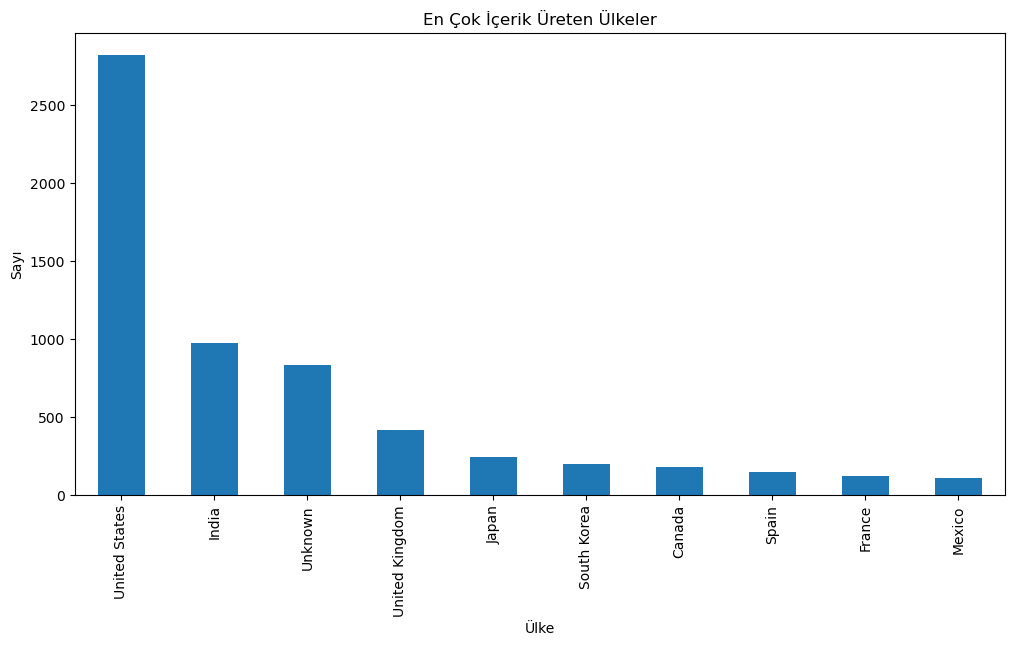

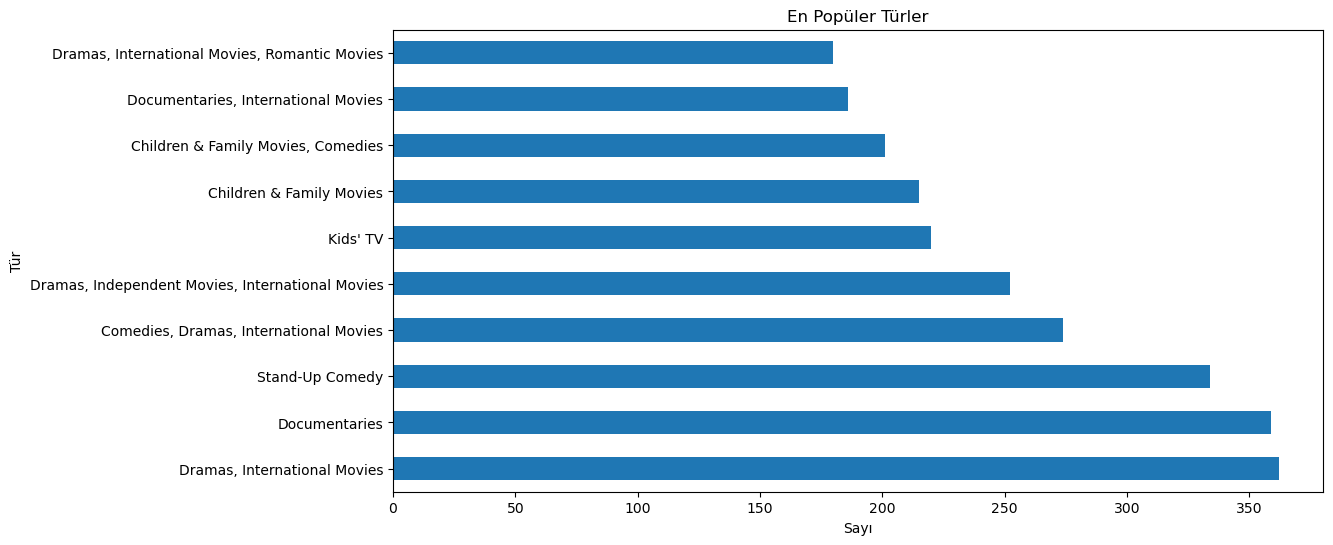

In [3]:
# Netflix Veri Analizi: Netflix yapımlarını keşifsel veri analizi ile inceler, tür, ülke ve yıllara göre dağılımı görselleştirir.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Veri Yükleme
df = pd.read_csv("netflix_titles.csv")

# 2️⃣ İlk İnceleme
print(df.head())
print(df.info())
print(df.isnull().sum())

# 3️⃣ Veri Temizleme
# Tarih sütunundaki boşlukları kaldır ve to_datetime ile çevir
df['date_added'] = df['date_added'].astype(str).str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Yeni yıl sütunu ekle
df['year_added'] = df['date_added'].dt.year

# Eksik 'country' değerlerini 'Unknown' ile doldur
df['country'].fillna('Unknown', inplace=True)

# 4️⃣ EDA & Görselleştirme
plt.figure(figsize=(10,6))
df['type'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title('Film vs TV Show')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12,6))
df['year_added'].value_counts().sort_index().plot()
plt.title('Yıllara Göre Yayınlanan Yapımlar')
plt.xlabel('Yıl')
plt.ylabel('Sayı')
plt.show()

plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('En Çok İçerik Üreten Ülkeler')
plt.xlabel('Ülke')
plt.ylabel('Sayı')
plt.show()

plt.figure(figsize=(12,6))
df['listed_in'].value_counts().head(10).plot(kind='barh')
plt.title('En Popüler Türler')
plt.xlabel('Sayı')
plt.ylabel('Tür')
plt.show()
